In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score
from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df = pd.DataFrame(df)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]
df.drop_duplicates(inplace = True)

0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isnull().mean()*10

Pregnancies                 0.000000
Glucose                     0.065104
BloodPressure               0.455729
SkinThickness               2.955729
Insulin                     4.869792
BMI                         0.143229
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

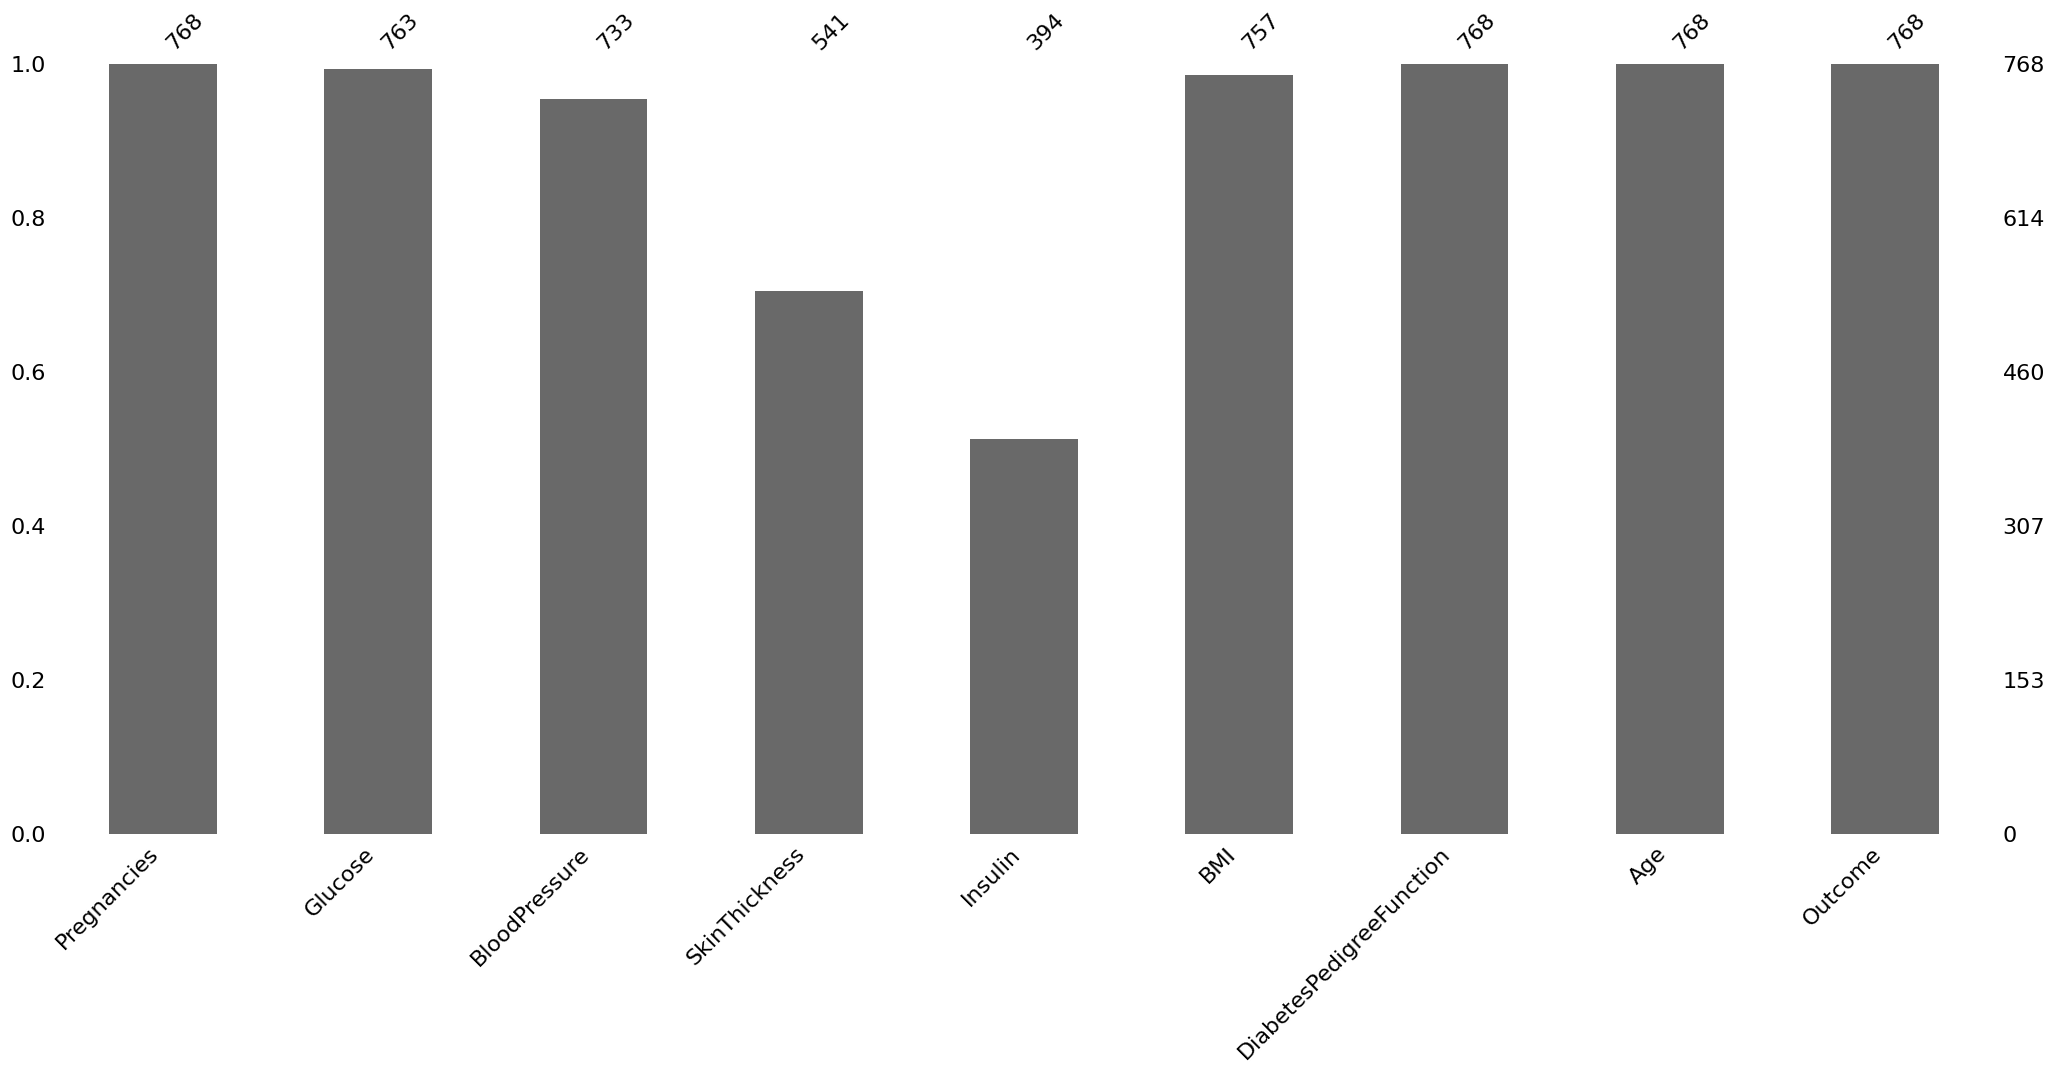

In [ ]:
msno.bar(df)
plt.show()

In [ ]:

def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:

columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

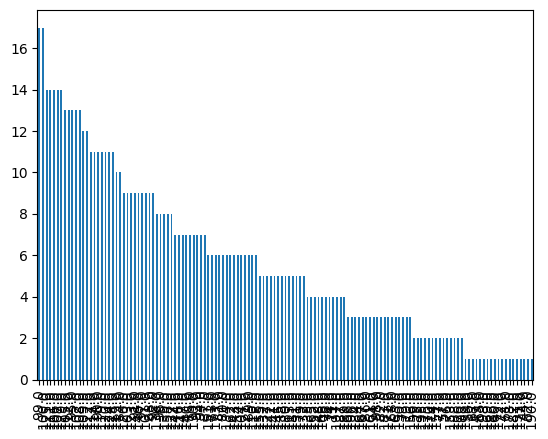

In [ ]:
df['Glucose'].value_counts().plot(kind = 'bar')
plt.show()

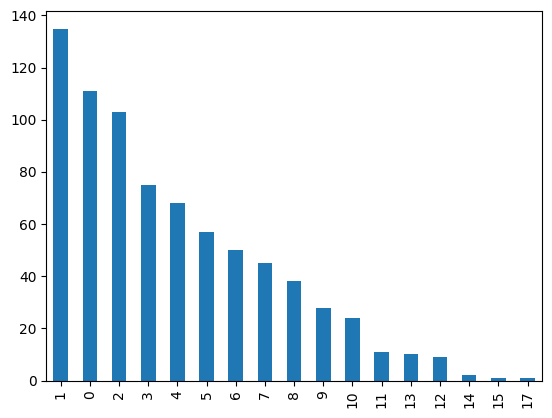

In [ ]:
df['Pregnancies'].value_counts().plot(kind = 'bar')
plt.show()

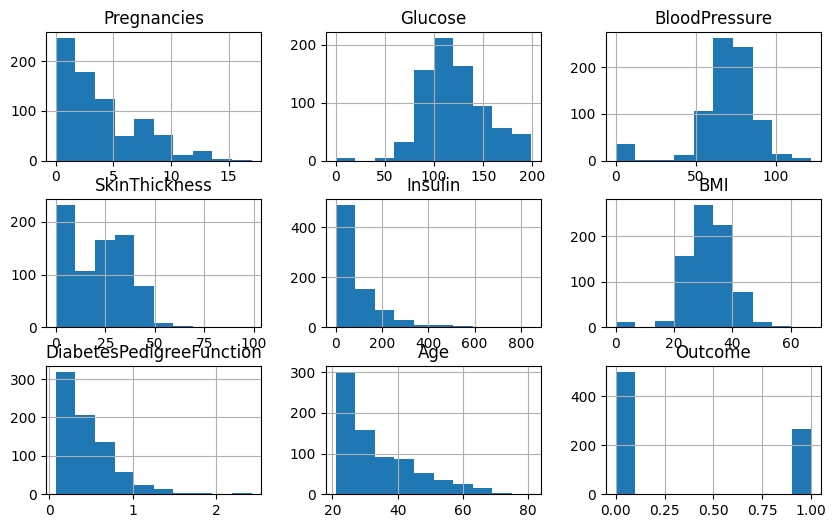

In [ ]:
df.hist(figsize=(10, 6));
plt.show()

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.089028,0.058767,0.023890,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.229289,0.490015,0.236171,0.138353,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.199349,0.070128,0.286399,-0.001443,0.325135,0.174469
SkinThickness,0.089028,0.229289,0.199349,1.000000,0.200129,0.566086,0.106280,0.129537,0.295138
Insulin,0.058767,0.490015,0.070128,0.200129,1.000000,0.238443,0.146878,0.123629,0.377081
BMI,0.023890,0.236171,0.286399,0.566086,0.238443,1.000000,0.152771,0.027849,0.315577
DiabetesPedigreeFunction,-0.033523,0.138353,-0.001443,0.106280,0.146878,0.152771,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.325135,0.129537,0.123629,0.027849,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.295138,0.377081,0.315577,0.173844,0.238356,1.000000


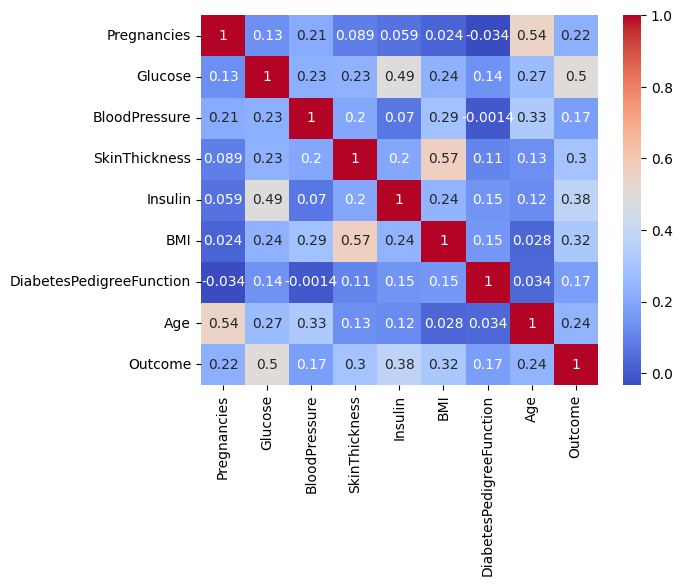

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [ ]:


def correlation(dataset , threshold):

     # Input validation
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("Input 'dataset' must be a pandas DataFrame.")
    if not (-1 <= threshold <= 1):
        raise ValueError("Threshold must be between -1 and 1.")

    col_corr = set() # set of all the names of correlated column
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] # Getting the name of the colummn
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train , 0.6)
len(set(corr_features))

0

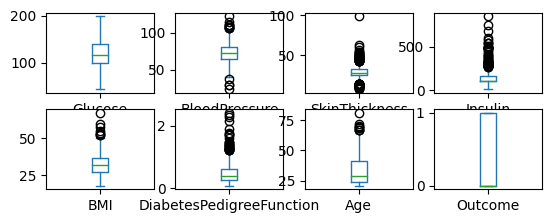

In [ ]:
df.drop('Pregnancies' ,axis = 1).plot(kind = 'box' , subplots = True , layout = (4,4) , sharex = False)
plt.show()

In [ ]:
def cap_data(df):
    df_copy = df.copy()
    for col in df_copy.columns:
        print("capping the", col)
        if df_copy[col].dtype in [float, int]:  # No need for separate checks
            percentiles = df_copy[col].quantile([0.25, 0.75]).values
            df_copy[col][df_copy[col] <= percentiles[0]] = percentiles[0]
            df_copy[col][df_copy[col] >= percentiles[1]] = percentiles[1]
    return df_copy

In [ ]:
final_df = cap_data(df.drop('Outcome' , axis = 1))
final_df['Outcome'] = df['Outcome'].copy()

capping the Pregnancies
capping the Glucose
capping the BloodPressure
capping the SkinThickness
capping the Insulin
capping the BMI
capping the DiabetesPedigreeFunction
capping the Age


In [ ]:
final_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,140.25,72.0,32.0,169.5,33.6,0.62625,41,1
1,1,99.75,66.0,29.0,102.5,27.5,0.35100,31,0
2,6,140.25,64.0,32.0,169.5,27.5,0.62625,32,1
3,1,99.75,66.0,25.0,102.5,28.1,0.24375,24,0
4,1,137.00,64.0,32.0,168.0,36.6,0.62625,33,1
...,...,...,...,...,...,...,...,...,...
763,6,101.00,76.0,32.0,169.5,32.9,0.24375,41,0
764,2,122.00,70.0,27.0,102.5,36.6,0.34000,27,0
765,5,121.00,72.0,25.0,112.0,27.5,0.24500,30,0
766,1,126.00,64.0,32.0,169.5,30.1,0.34900,41,1


In [ ]:
plot_frame = final_df.groupby('Age')[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].mean().reset_index()
plot_frame.head(5)

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,24,1.730594,113.792237,69.378995,27.762557,121.842466,31.082648,0.401903
1,25,2.041667,112.484375,68.302083,28.479167,123.562500,32.339583,0.430542
2,26,2.242424,115.712121,70.863636,28.636364,123.227273,33.212121,0.392250
3,27,2.718750,116.109375,73.921875,28.500000,124.953125,31.584375,0.438969
4,28,3.085714,117.857143,71.871429,29.028571,126.642857,33.114286,0.402421


In [ ]:
def plot(df, df_target_column, list_of_imputed_columns):

    for imputed_column in list_of_imputed_columns:

        sns.kdeplot(x=df[df_target_column], y=df[imputed_column], fill=True, color = 'm')
        plt.xlabel(df_target_column)
        plt.ylabel(imputed_column)
        plt.legend()
        plt.title(f'Histogram for {imputed_column} based on {df_target_column}')
        plt.show()

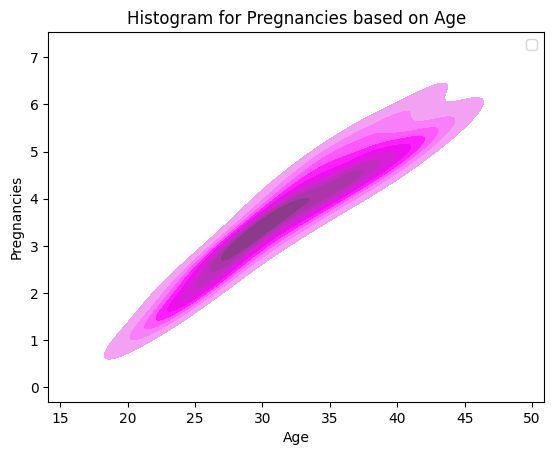

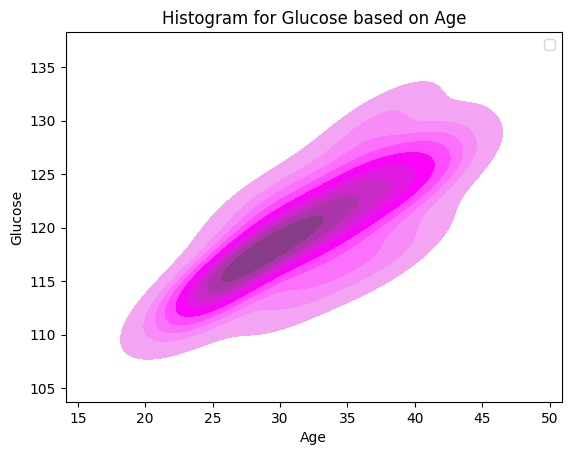

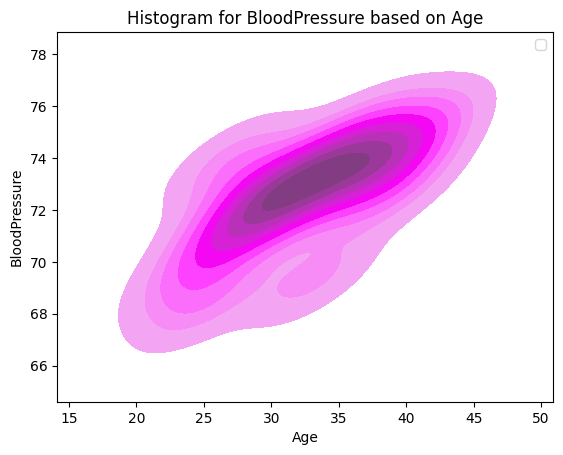

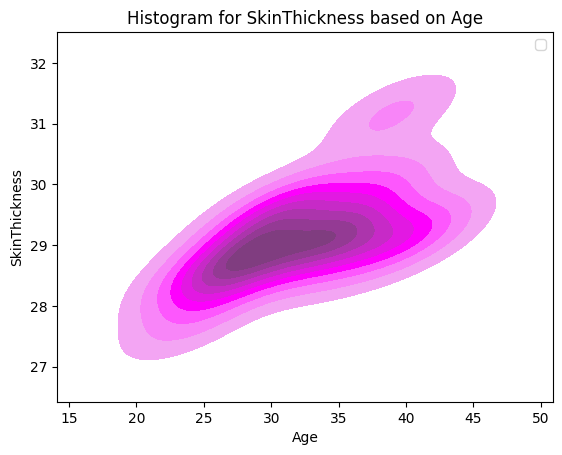

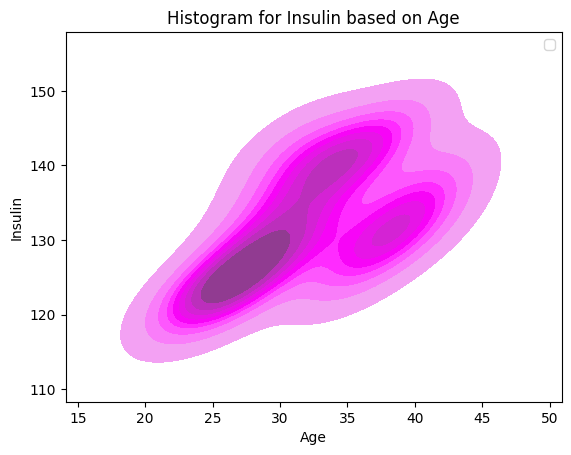

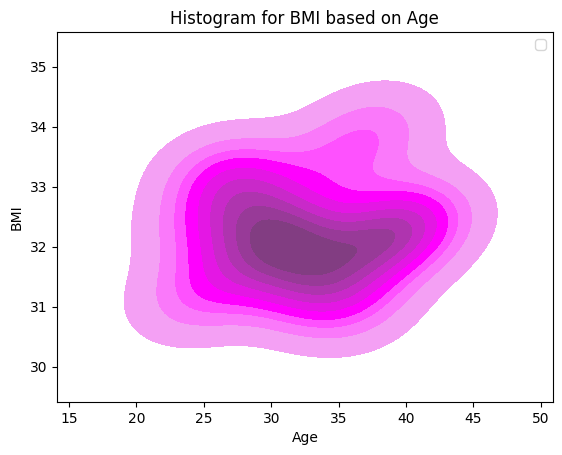

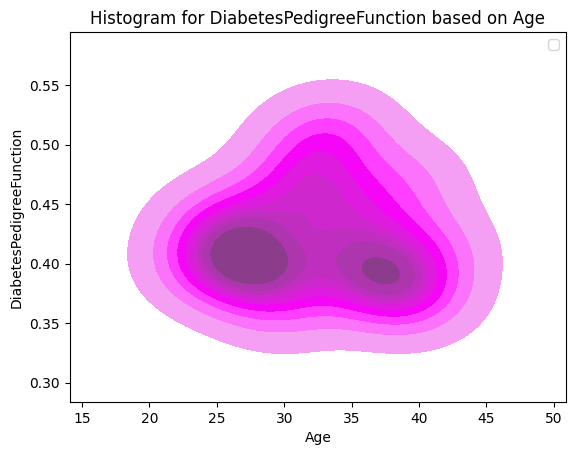

In [ ]:
plot(plot_frame , 'Age' , ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'])

In [ ]:
scaler = MinMaxScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,IsolationForest,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
ifc = IsolationForest(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
cat = CatBoostClassifier(n_estimators=50,random_state=2)
lgb = LGBMClassifier(n_estimators=50,random_state=2)

In [ ]:
classifiers = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'ifc': ifc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')

    return accuracy, precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():

    current_accuracy,current_precision = train_classifier(clf, X_train_trf,y_train,X_test_trf,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.5194805194805194
Precision -  0.4558840058446668
For  KN
Accuracy -  0.7597402597402597
Precision -  0.7684582248046484
For  NB
Accuracy -  0.6428571428571429
Precision -  0.413265306122449
For  DT
Accuracy -  0.8571428571428571
Precision -  0.8559766763848397
For  LR
Accuracy -  0.7792207792207793
Precision -  0.7763726849963286
For  RF
Accuracy -  0.8831168831168831
Precision -  0.884324212593339
For  ifc
Accuracy -  0.2662337662337662
Precision -  0.11351052048726468
For  AdaBoost
Accuracy -  0.8441558441558441
Precision -  0.8499660043816575
For  BgC
Accuracy -  0.8701298701298701
Precision -  0.8714311552076067
For  ETC
Accuracy -  0.8441558441558441
Precision -  0.8441558441558441
For  GBDT
Accuracy -  0.8636363636363636
Precision -  0.8658405172413793
For  xgb
Accuracy -  0.8571428571428571
Precision -  0.8571428571428571
Learning rate set to 0.130475
0:	learn: 0.6398654	total: 50.8ms	remaining: 2.49s
1:	learn: 0.5962943	total: 57.1ms	remaining: 1.37s
2:	l

In [ ]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores , 'Precision': precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.519481,0.455884
1,KN,0.759740,0.768458
2,NB,0.642857,0.413265
3,DT,0.857143,0.855977
4,LR,0.779221,0.776373
5,RF,0.883117,0.884324
6,ifc,0.266234,0.113511
7,AdaBoost,0.844156,0.849966
8,BgC,0.870130,0.871431
9,ETC,0.844156,0.844156


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.519481
1,KN,Accuracy,0.759740
2,NB,Accuracy,0.642857
3,DT,Accuracy,0.857143
4,LR,Accuracy,0.779221
5,RF,Accuracy,0.883117
6,ifc,Accuracy,0.266234
7,AdaBoost,Accuracy,0.844156
8,BgC,Accuracy,0.870130
9,ETC,Accuracy,0.844156


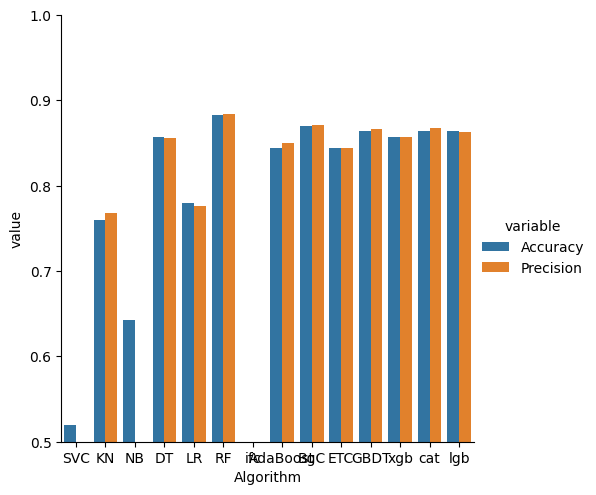

In [ ]:

sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[
    ('RF', rfc),
    ('xgb', xgb),
    ('bgc', bc)
],voting='soft')

In [ ]:
voting.fit(X_train_trf , y_train)
y_pred = voting.predict(X_test_trf)
print('Accuracy Score is ::',accuracy_score(y_test , y_pred))

Accuracy Score is :: 0.8701298701298701


In [ ]:
X = final_df.iloc[: , :8]
y = final_df.iloc[: , -1]
print(np.mean(cross_val_score(voting ,X , y ,cv=10 , scoring='accuracy')))

## ACCURACY IS 86% :D

0.849025974025974
